In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision
import torch
import os
from utils import *
os.environ['KMP_DUPLICATE_LIB_OK']='True' # add this, otherwise the model will easily died because of plt
%matplotlib inline

## first layers weight visualization

we choose alex net because its' first conv's filter size is 11x11, much big than common 3x3, so we can esaily find pattern here.

In [5]:
model = torchvision.models.alexnet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

In [6]:
first_conv_weight = model.features[0].weight.data
plot_img_tensor(first_conv_weight)

NameError: name 'plt' is not defined

In [7]:
model = torchvision.models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
layer = model.features[:19]
print(layer)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

## visualize high layers's filter

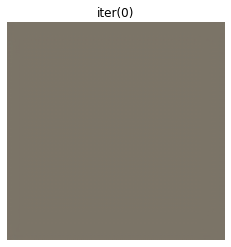

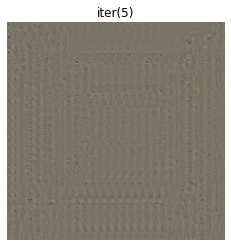

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


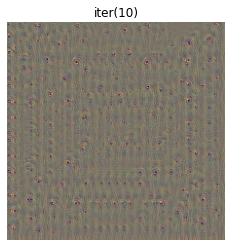

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


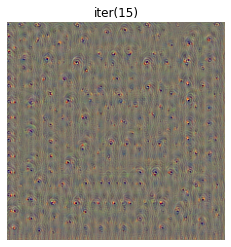

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


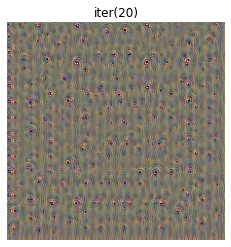

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


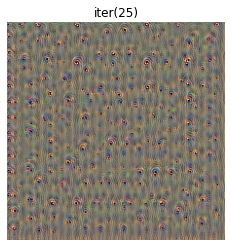

In [ ]:
iter_num = 30
l_r = 10
show_every = 5
filter_choosed = 3

# choose zores make it easier to see the pattern
# otherwise the init random noise may cover the pattern
noise = torch.zeros(1, 3, 224, 224)

out = noise.clone()
for i in range(iter_num):
    noise.requires_grad = True
    layer_out = layer(noise)
    
    # we choose to maximize the mean of the selected filter
    loss = torch.mean(layer_out[0, filter_choosed, ...])

    loss.backward()
    
    grad_data = noise.grad.data
    out += l_r * grad_data

    noise = out.clone()
    
    # show res img
    if i % show_every == 0:
            plt.imshow(out.squeeze(0).permute(1,2,0).numpy() * std + mean)
            plt.axis("off")
            plt.title(f"iter({i})")
            plt.gcf().set_size_inches(4,4)
            plt.show()
